In [37]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load Dataset
df = pd.read_csv("F:/OneDrive - University of Hertfordshire/DS Project/imdb_movie_dataset.csv")

In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df.shape

(1000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# Drop missing target rows
df = df.dropna(subset=['Revenue (Millions)'])

In [9]:
# Impute 'Metascore'
imputer = SimpleImputer(strategy='mean')
df['Metascore'] = imputer.fit_transform(df[['Metascore']])

In [10]:
#df['Revenue (Millions)'] = np.log1p(df['Revenue (Millions)'])

In [11]:
#Q1 = df['Revenue (Millions)'].quantile(0.25)
#Q3 = df['Revenue (Millions)'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

In [12]:
#df = df[(df['Revenue (Millions)'] >= lower_bound) & (df['Revenue (Millions)'] <= upper_bound)]

In [13]:
#df['Votes'] = np.log1p(df['Votes'])
#df['Runtime (Minutes)'] = np.log1p(df['Runtime (Minutes)'])
#df['Rating_Votes'] = df['Rating'] * df['Votes']

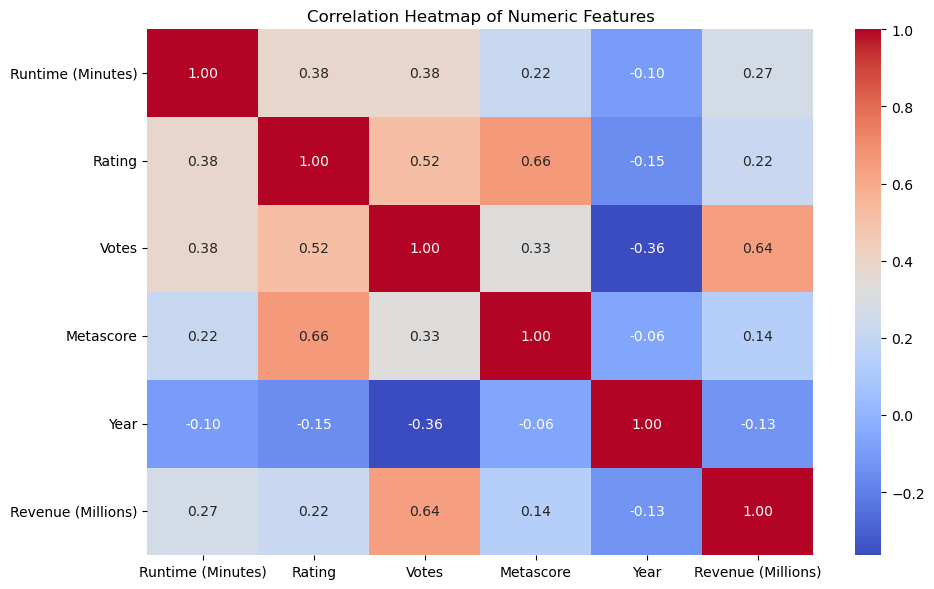

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year', 'Revenue (Millions)']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

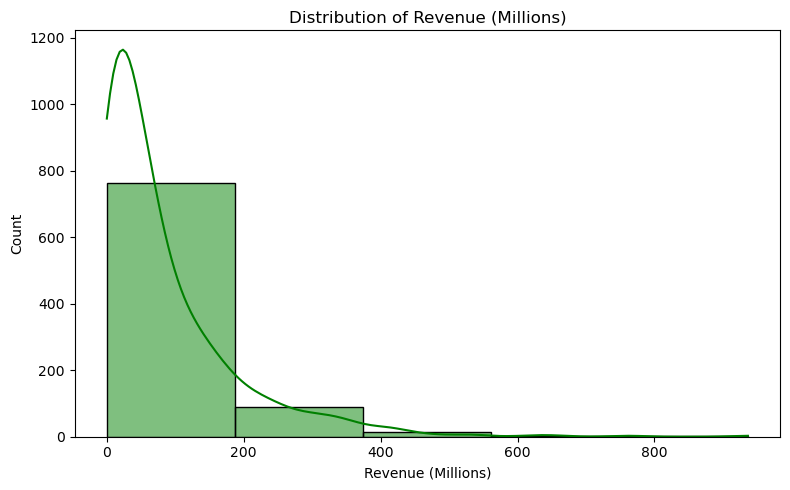

In [15]:
# Distribution of Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue (Millions)'], bins=5, kde=True, color='green')
plt.title("Distribution of Revenue (Millions)")
plt.xlabel("Revenue (Millions)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
# Feature Engineering
df['MainGenre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [17]:
top_directors = df['Director'].value_counts().nlargest(10).index
df['TopDirector'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

In [18]:
df['LeadActor'] = df['Actors'].apply(lambda x: x.split(',')[0])
top_actors = df['LeadActor'].value_counts().nlargest(10).index
df['TopActor'] = df['LeadActor'].apply(lambda x: x if x in top_actors else 'Other')

In [19]:
# Select Features
features = ['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year', 'MainGenre', 'TopDirector', 'TopActor']
X = df[features]
y = df['Revenue (Millions)']

In [20]:
categorical = ['MainGenre', 'TopDirector', 'TopActor']
numerical = ['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year']

In [21]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

In [22]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [32]:

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("R2 Score:", r2_score(y_test, y_pred_lr))

MAE: 52.2513109635244
RMSE: 81.96511261394295
R2 Score: 0.48519481361374805


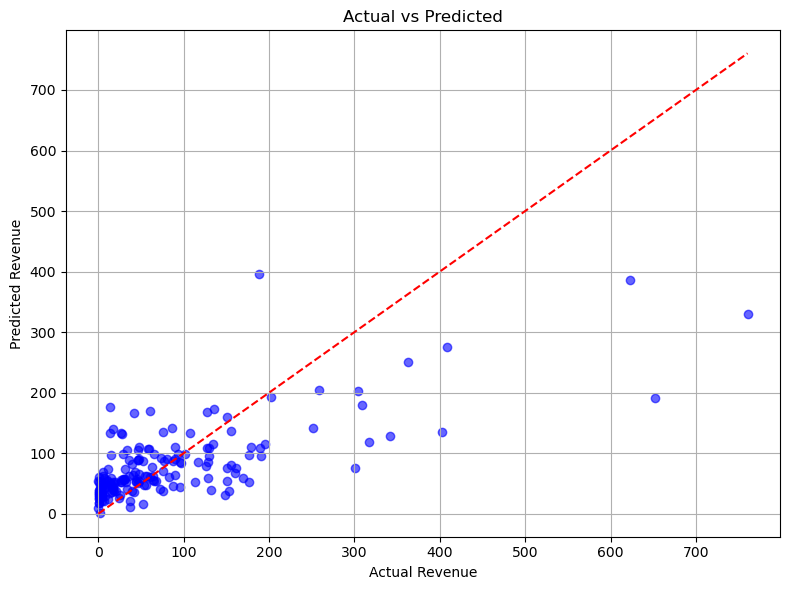

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

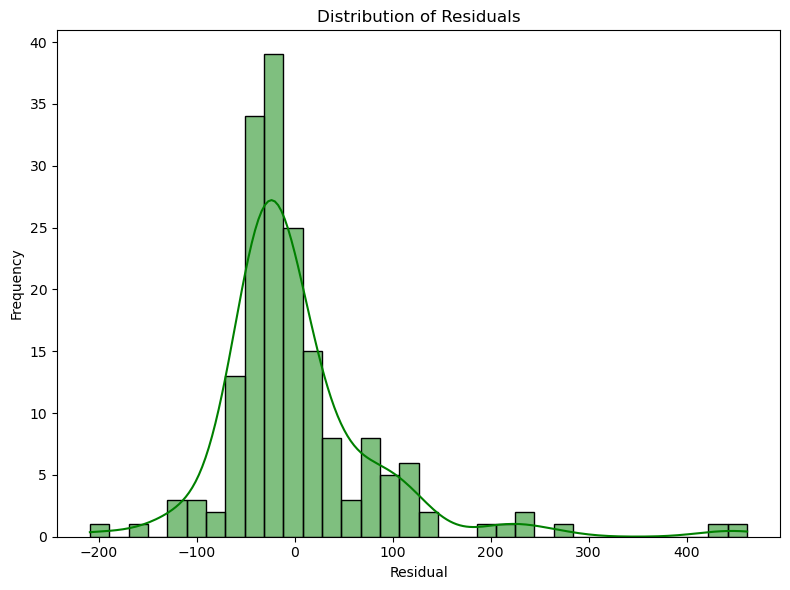

In [39]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_lr
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Decision Tree

In [40]:
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42, max_depth=5))
])
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_dt))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

print("R² Score:", r2_score(y_test, y_pred_dt))

MAE: 49.466975419456816
RMSE: 83.62849394970176
R² Score: 0.46408811917842585


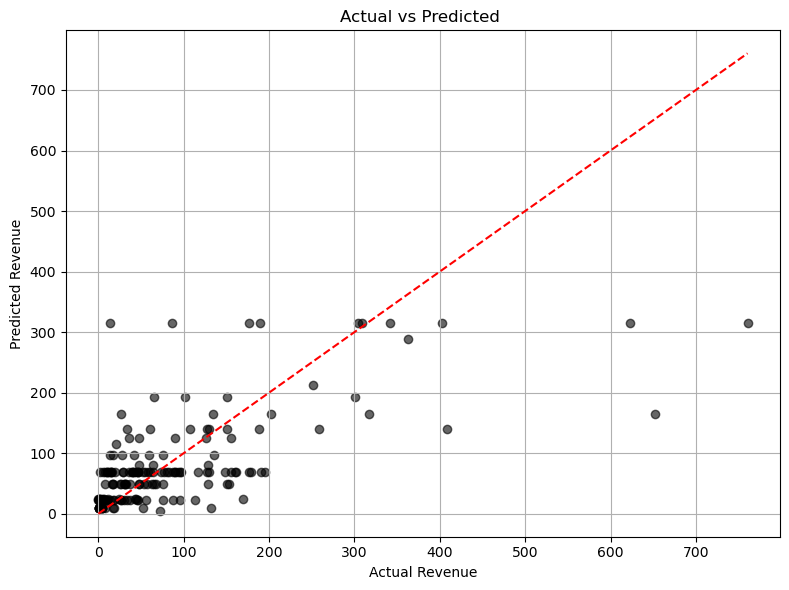

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted ')
plt.grid(True)
plt.tight_layout()
plt.show()

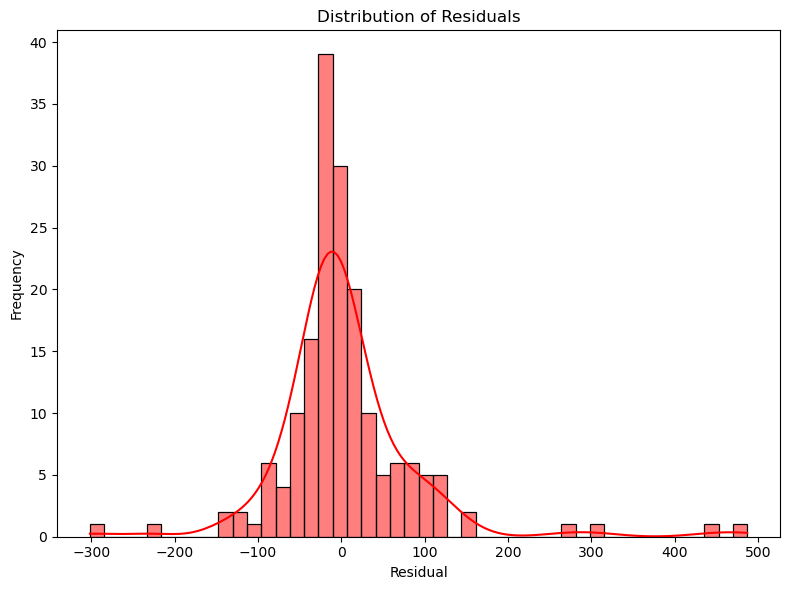

In [55]:
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(8, 6))
sns.histplot(residuals_dt, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Random Forest

In [46]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("R² Score:", r2_score(y_test, y_pred_rf))

MAE: 41.53604127120411
RMSE: 74.15361451749624
R² Score: 0.5786437078307785


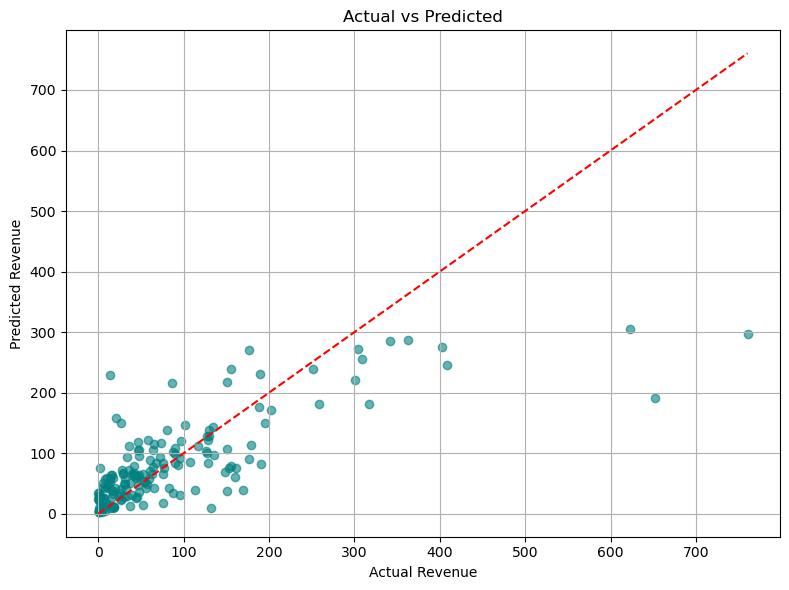

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


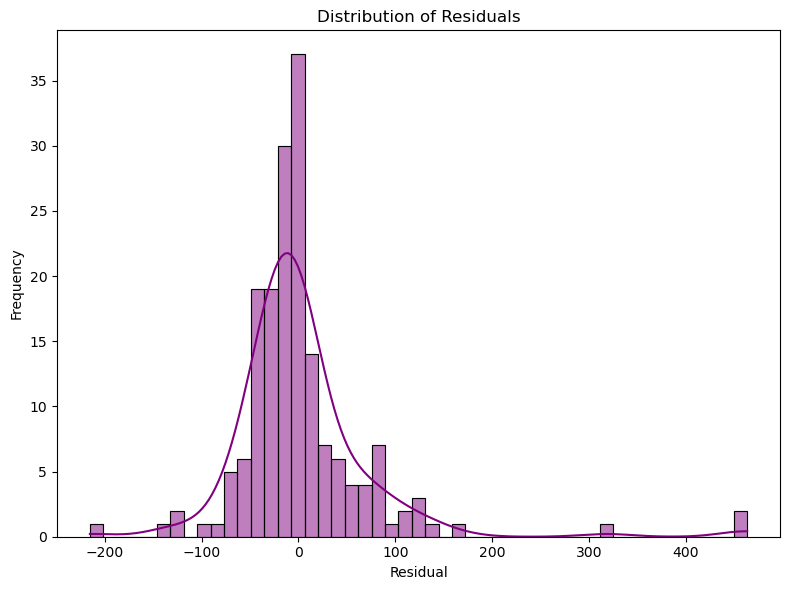

In [54]:
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# XGBoost

In [56]:
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

print("R² Score:", r2_score(y_test, y_pred_xgb))

MAE: 40.62607203862327
RMSE: 67.40837378091702
R² Score: 0.6518130148316355


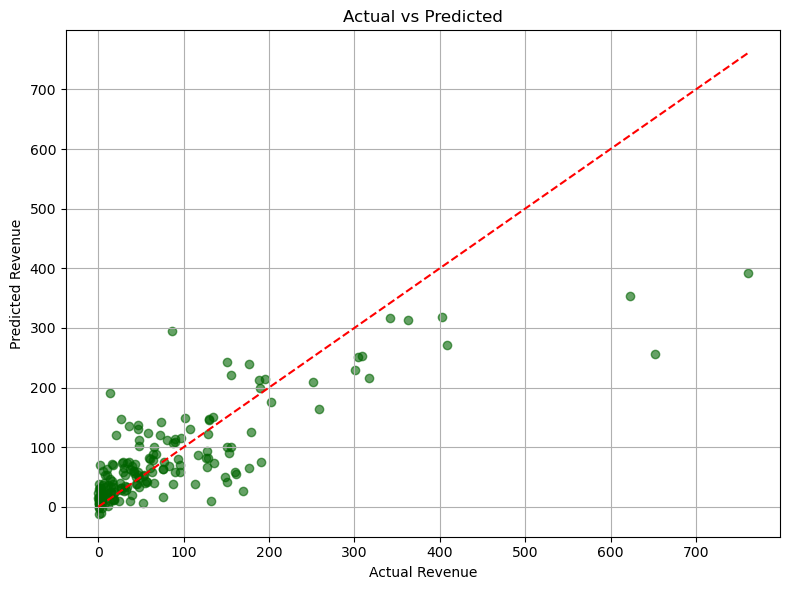

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='darkgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

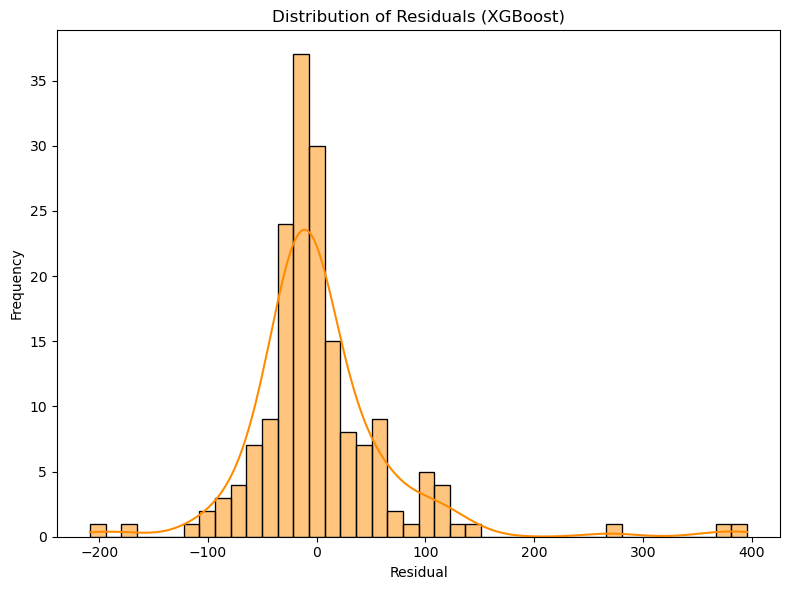

In [60]:
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgb, kde=True, color='darkorange')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

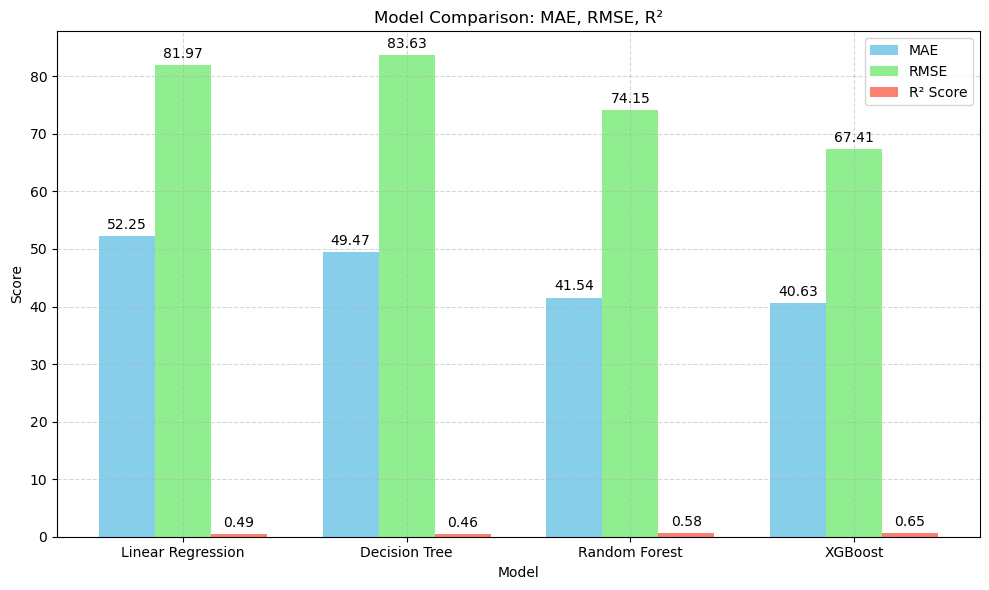

In [62]:
# Model Comparison Bar Plot
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

import matplotlib.pyplot as plt

x = np.arange(len(metrics['Model']))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, metrics['MAE'], width, label='MAE', color='skyblue')
bars2 = ax.bar(x, metrics['RMSE'], width, label='RMSE', color='lightgreen')
bars3 = ax.bar(x + width, metrics['R2'], width, label='R² Score', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: MAE, RMSE, R²')
ax.set_xticks(x)
ax.set_xticklabels(metrics['Model'])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()


In [63]:
importances = model_rf.named_steps['model'].feature_importances_
feature_names = model_rf.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False).head(10)


,Feature,Importance
37,remainder__Votes,0.514159
2,cat__MainGenre_Animation,0.083992
35,remainder__Runtime (Minutes),0.073794
36,remainder__Rating,0.073204
39,remainder__Year,0.071672
38,remainder__Metascore,0.046120
15,cat__TopDirector_J.J. Abrams,0.042567
0,cat__MainGenre_Action,0.034680
1,cat__MainGenre_Adventure,0.013786
14,cat__TopDirector_David Yates,0.010829
